In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We assign the excel file to variable hb

In [ ]:
hb= pd.read_excel("/content/hotel_bookings.xlsx")
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03


# Preprocessing data

<Axes: >

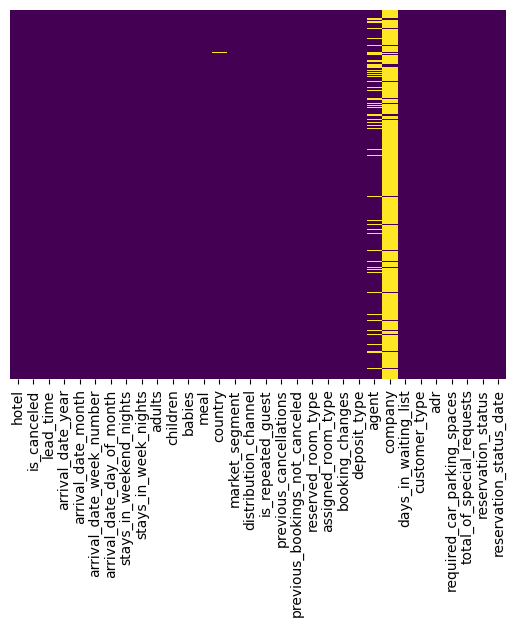

In [ ]:
sns.heatmap(hb.isnull(), yticklabels=False , cbar=False , cmap="viridis")

**We decided to delete columnn "company" because NULL values are a majority**

In [ ]:
hb.drop("company",axis=1, inplace =True)

<Axes: >

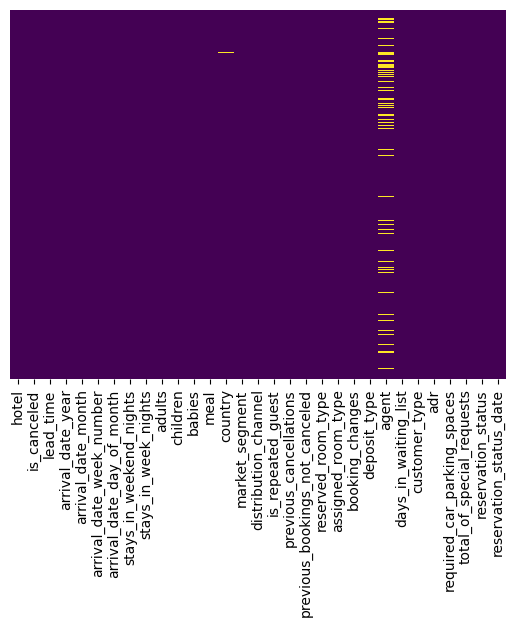

In [ ]:
sns.heatmap(hb.isnull(), yticklabels=False , cbar=False , cmap="viridis")

**Now we convert NULL values in Agent to 0**

In [ ]:
hb['agent'] = hb['agent'].fillna(0)

<Axes: >

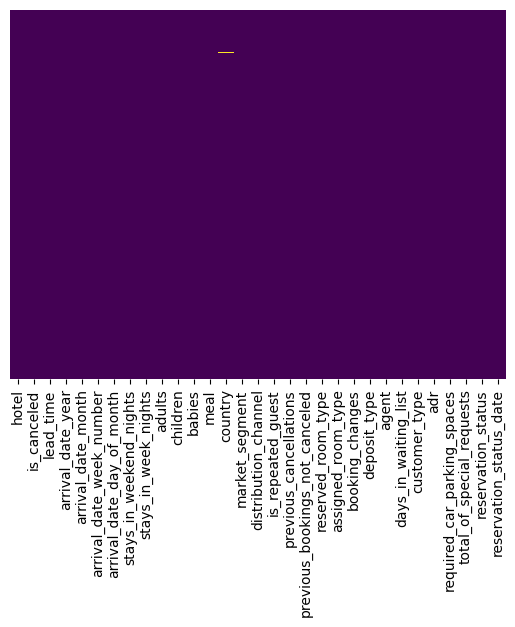

In [ ]:
sns.heatmap(hb.isnull(), yticklabels=False , cbar=False , cmap="viridis")

**Now we change agent column to string type**

In [ ]:
hb['agent'] = hb['agent'].astype(str)

object


<Axes: >

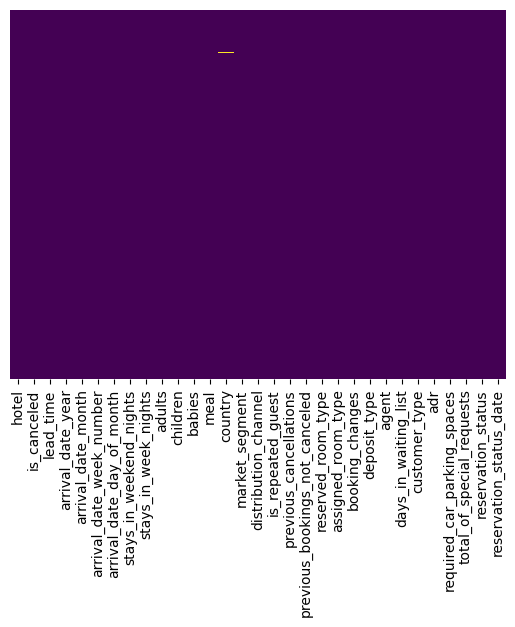

In [ ]:
sns.heatmap(hb.isnull(), yticklabels=False , cbar=False , cmap="viridis")

**We delete the remaining NULL value given that it's only one and does not affect the dataset when deleted**

In [ ]:
hb.dropna(inplace=True)

<Axes: >

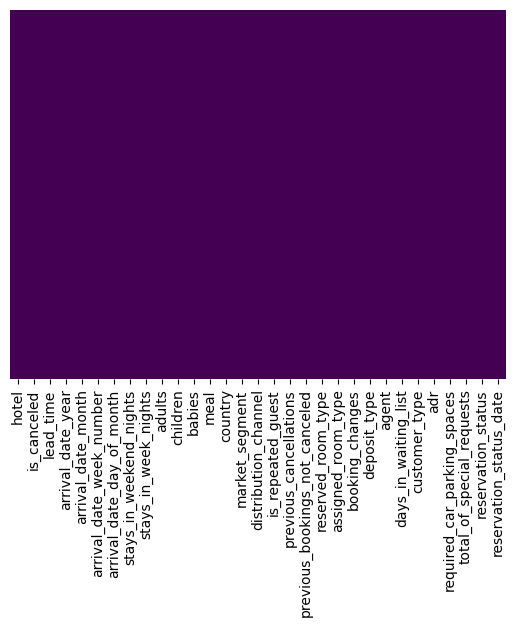

In [ ]:
sns.heatmap(hb.isnull(), yticklabels=False , cbar=False , cmap="viridis")

**Encoding "reservation statues", First column "Check-out" -> If True then customer checked out, if False customer canceled.
Second column named "No-show", if both "Check-out" and "Customer-cancel" are false, then that means the customer is a no-show**

In [ ]:
resStatus = pd.get_dummies(hb['reservation_status'], drop_first = True)
hb = pd.concat([hb, resStatus], axis = 1)

In [ ]:
hb.drop('reservation_status', axis=1, inplace = True)

In [ ]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Check-Out,No-Show
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0,0,0,2015-07-01,True,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0,0,0,2015-07-01,True,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75,0,0,2015-07-02,True,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75,0,0,2015-07-02,True,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98,0,1,2015-07-03,True,False
